In [2]:
#Catalog Comparisons

In [3]:
import numpy as np
import pandas as pd
import csky as cy
import matplotlib.pyplot as plt
cy.plotting.mrichman_mpl

<function csky.plotting.mrichman_mpl(tex=True, sans=True, colors=array(['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f'], dtype='<U7'))>

In [4]:
names = []
ras = [] 
decs = []
types = []
srcs = []

#fout = open('../catalogs/initial_list_DNN_20210907.csv')
for line in  open('../catalogs/initial_list_DNN_20210907.txt'):
    print(line.split()[4:])
    names.append(np.str(line.split()[0]))
    ras.append(np.float(line.split()[1]))
    decs.append(np.float(line.split()[2]))
    types.append(np.str(line.split()[3]))
    srcs.append(np.str(line.split()[4:]))

['G343.1-2.3']
['HESS', 'J0835-455']
['PKS', '0426-380']
['PKS', '2155-304']
['Mkn', '421']
['PKS', '0537-441']
['PKS', '0447-439']
['BL', 'Lac']
['PG', '1553+113']
['TXS', '0518+211']
['PKS', '0235+164']
['PKS', '1424+240']
['3C', '66A']
['TXS', '0506+056']
['AP', 'Librae']
['S5', '0716+71']
['B2', '1215+30']
['MH', '2136-428']
['PKS', '2233-148']
['Mkn', '501']
['PMN', 'J1603-4904']
['S2', '0109+22']
['PKS', '0301-243']
['4C', '+01.28']
['PKS', '0700-661']
['TXS', '0628-240']
['PKS', '0823-223']
['PKS', '0735+17']
['PMN', 'J1329-5608']
['PMN', 'J0531-4827']
['MG1', 'J021114+1051']
['PKS', '1440-389']
['OT', '081']
['OJ', '287']
['PKS', '1101-536']
['TXS', '0141+268']
['1H', '1013+498']
['PKS', '0048-09']
['PMN', 'J1650-5044']
['PKS', '0118-272']
['1H', '1914-194']
['PKS', '0332-403']
['OJ', '014']
['PMN', 'J1918-4111']
['PKS', '1936-623']
['1H', '1720+117']
['PMN', 'J1610-6649']
['PMN', 'J0334-3725']
['TXS', '1714-336']
['PKS', '2005-489']
['PKS', 'B1056-113']
['RGB', 'J2243+203']
['

In [38]:
DNN= pd.DataFrame(np.vstack([np.array(names),np.array(ras),np.array(decs),np.array(types),np.array(srcs)]).T, columns=['Names', 'RA', 'DEC', 'Types', 'SRC'])

In [39]:
DNN.Names = DNN.Names.to_string
DNN.RA = DNN.RA.astype(np.float)
DNN.DEC = DNN.DEC.astype(np.float)
DNN.Types = DNN.Names.to_string

In [40]:
ex_DNN = DNN.drop([104, 106, 107])

In [41]:
ex_DNN_ras = ex_DNN.RA
ex_DNN_decs = ex_DNN.DEC

In [44]:
ESTES = np.load('../catalogs/ExGalSourceList_ESTES_SENS_E200.npy')

In [45]:
ESTES_decs = ESTES[0]
ESTES_ras = ESTES[1]

In [47]:
import healpy as hp

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you wi

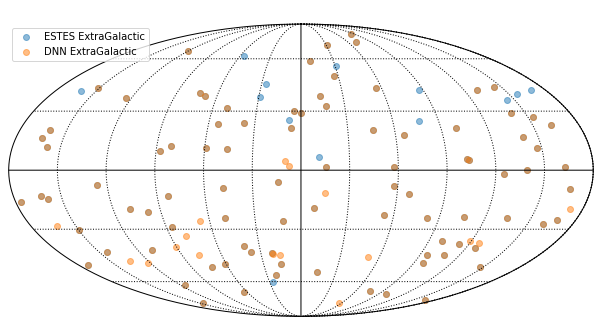

In [68]:
hp.mollview()
hp.graticule()
plt.title(' ')
hp.projscatter(np.radians(ESTES_decs) - np.pi/2, np.radians(ESTES_ras), label = 'ESTES ExtraGalactic', alpha = .5)
hp.projscatter(np.radians(ex_DNN_decs) - np.pi/2,np.radians(ex_DNN_ras),  label = 'DNN ExtraGalactic', alpha = .5)
plt.legend()

In [60]:
np.round(ex_DNN_decs,2).values

array([-4.430e+01, -4.519e+01, -3.794e+01, -3.023e+01,  3.821e+01,
       -4.409e+01, -4.384e+01,  4.228e+01,  1.119e+01,  2.121e+01,
        1.662e+01,  2.380e+01,  4.304e+01,  5.700e+00, -2.437e+01,
        7.134e+01,  3.012e+01, -4.259e+01, -1.456e+01,  3.976e+01,
       -4.906e+01,  2.275e+01, -2.412e+01,  1.560e+00, -6.618e+01,
       -2.411e+01, -2.251e+01,  1.771e+01, -5.612e+01, -4.846e+01,
        1.086e+01, -3.915e+01,  9.650e+00,  2.012e+01, -5.396e+01,
        2.709e+01,  4.943e+01, -9.490e+00, -5.075e+01, -2.702e+01,
       -1.936e+01, -4.015e+01,  1.780e+00, -4.119e+01, -6.218e+01,
        1.187e+01, -6.681e+01, -3.743e+01, -3.370e+01, -4.882e+01,
       -1.157e+01,  2.036e+01,  6.515e+01,  4.238e+01, -1.936e+01,
       -2.811e+01, -4.390e+01, -7.550e+01,  1.615e+01, -4.211e+01,
       -5.790e+00,  1.173e+01, -9.110e+00, -2.341e+01,  1.050e+01,
       -2.106e+01, -4.993e+01, -1.169e+01,  2.138e+01, -1.592e+01,
        1.580e+00, -7.590e+00,  2.924e+01,  3.814e+01, -2.580e

In [69]:
dnns = 0
estes = 0
print(len(np.intersect1d(np.round(ex_DNN_decs,2), np.round(ESTES_decs, 2))))
uniques = np.setxor1d(np.round(ex_DNN_decs,2).values , np.round(ESTES_decs, 2))
for u in uniques:
    print(u)
    if u in np.round(ex_DNN_decs,2).values: 
        print('In DNN')
        dnns+=1
    if u in np.round(ESTES_decs, 2):
        print('In ESTES')
        estes+=1
        
print(dnns)
print(estes)

90
-75.5
In DNN
-60.45
In ESTES
-48.82
In DNN
-47.24
In DNN
-45.19
In DNN
-44.3
In DNN
-43.9
In DNN
-43.5
In DNN
-39.67
In DNN
-37.43
In DNN
-36.09
In DNN
-33.7
In DNN
-28.11
In DNN
-25.46
In DNN
-11.57
In DNN
2.05
In DNN
4.73
In DNN
6.63
In ESTES
25.05
In ESTES
25.3
In ESTES
35.94
In ESTES
37.5
In ESTES
39.1
In ESTES
40.96
In ESTES
41.24
In ESTES
41.37
In ESTES
44.88
In ESTES
55.38
In ESTES
61.5
In ESTES
16
13
